<a href="https://colab.research.google.com/github/LucaAPiattelli/UNI/blob/main/PY_08_UNI_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

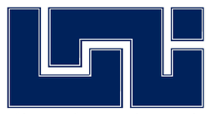

</center>

<center>
<font color="#091f60">
<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Avanzada con Power BI, R y Python

</font>
</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

<font color="#091f60">
<h1><b>
Reglas de Asociación - ASociation Rules Mining

</font>

### Instalar librerías necesarias

In [ ]:
pip install pycaret[full]

     |████████████████████████████████| 266 kB 9.8 MB/s 
     |████████████████████████████████| 261 kB 64.9 MB/s 
     |████████████████████████████████| 1.3 MB 34.7 MB/s 
     |████████████████████████████████| 2.0 MB 61.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 89.2 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 6.8 MB 43.0 MB/s 
     |████████████████████████████████| 271 kB 65.8 MB/s 
     |████████████████████████████████| 14.6 MB 125 kB/s 
     |████████████████████████████████| 1.7 MB 66.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 80.2 MB/s 
     |████████████████████████████████| 166.7 MB 16 kB/s 
     |████████████████████████████████| 67.4 MB 31 kB/s 
     |███████████████████

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.arules import *

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Extracción de datos

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/UNI/main/Datasets/Asociacion/supermercado.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Configurando entorno Pycaret

La función setup() inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función setup() debe ser llamada antes de ejecutar cualquier función de PyCaret. 

Se necesita un parámetro obligatorios: 
- Un marco de datos de Pandas 
- un id de transacción (columna)
- un id de producto (columna)

Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.

Cuando se ejecuta setup(), el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades. 

El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta setup(). 

Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático. 

Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.

In [ ]:
arules = setup(data = data, transaction_id = "Member_number", item_id = "itemDescription")

Description,Value
session_id,945
# Transactions,3898
# Items,167
Ignore Items,None


* Transacciones: Cantidad de transacciones únicas en el dataset
* Items: Cantidad de items únicos en el dataset
* Ignore items: Items ignorados en el dataset

Una vez que la configuración se ha ejecutado con éxito, se muestra un cuadro de información que contiene elementos importantes. La mayor parte de la información está relacionada con el preprocesamiento que se construye cuando se ejecuta setup ()

# Creación del Modelo

A la hora de crear el modelo podemos definir:
* metric: Métrica a evaluar , por default es confidence. Podemos elegir "suport", "lift", "leverage", "conviction"
* threshold: Mínimo threshold para la evaluación de la métrica, para determinar si el candidato es interesante, por default es 0.5
* min_support: Support mínimo valor entre 0 y 1, por default es 0.05

[muchas más](https://pycaret.readthedocs.io/en/latest/api/arules.html)

In [ ]:
modelo = create_model()

30 reglas creadas!

In [ ]:
modelo.shape

(30, 9)

In [ ]:
modelo.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(other vegetables, bottled water)",(whole milk),0.0939,0.4582,0.0562,0.5984,1.3059,0.0132,1.3490
1,"(yogurt, other vegetables)",(whole milk),0.1203,0.4582,0.0718,0.5970,1.3030,0.0167,1.3445
2,"(rolls/buns, yogurt)",(whole milk),0.1113,0.4582,0.0659,0.5922,1.2924,0.0149,1.3285
3,"(rolls/buns, other vegetables)",(whole milk),0.1467,0.4582,0.0821,0.5594,1.2210,0.0149,1.2298
4,"(soda, yogurt)",(whole milk),0.0975,0.4582,0.0544,0.5579,1.2176,0.0097,1.2255


# Visualizar modelo

In [ ]:
plot_model(modelo)

In [ ]:
plot_model(modelo, plot = "3d")

# Modificar modelo

In [ ]:
modelo2 = create_model(metric = "lift", min_support = 0.15)

In [ ]:
modelo2.shape

(8, 9)

In [ ]:
modelo2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.2830,0.4582,0.1506,0.5322,1.1615,0.0209,1.1582
1,(whole milk),(yogurt),0.4582,0.2830,0.1506,0.3287,1.1615,0.0209,1.0681
2,(rolls/buns),(whole milk),0.3497,0.4582,0.1786,0.5106,1.1145,0.0183,1.1072
3,(whole milk),(rolls/buns),0.4582,0.3497,0.1786,0.3897,1.1145,0.0183,1.0656
4,(whole milk),(other vegetables),0.4582,0.3766,0.1914,0.4177,1.1091,0.0188,1.0706


In [ ]:
plot_model(modelo2)

# Reglas de Asociación en Power BI

In [ ]:
modelo_pbi = get_rules(
    data = data, 
    transaction_id = "Member_number", 
    item_id = "itemDescription", 
    metric = "lift", 
    min_support = 0.15)

Description,Value
session_id,6781
# Transactions,3898
# Items,167
Ignore Items,None


In [ ]:
modelo_pbi.shape

(8, 9)

In [ ]:
modelo_pbi.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.2830,0.4582,0.1506,0.5322,1.1615,0.0209,1.1582
1,(whole milk),(yogurt),0.4582,0.2830,0.1506,0.3287,1.1615,0.0209,1.0681
2,(rolls/buns),(whole milk),0.3497,0.4582,0.1786,0.5106,1.1145,0.0183,1.1072
3,(whole milk),(rolls/buns),0.4582,0.3497,0.1786,0.3897,1.1145,0.0183,1.0656
4,(whole milk),(other vegetables),0.4582,0.3766,0.1914,0.4177,1.1091,0.0188,1.0706


![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)